Speed Dating alaysis: Background

This data was gathered from participants in experimental speed dating events from 2002-2004.

During the events, the attendees would have a four-minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')

Data Import

In [2]:
data_file= pd.read_csv('D:\\JupyterNotebook\\GitHub\\Dating-Analysis-\\Data\\Speed Dating Data.csv',encoding= 'unicode_escape' )

In [3]:
data_file.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df=data_file


In [5]:
data_file.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

Text(0, 0.5, 'Frequency')

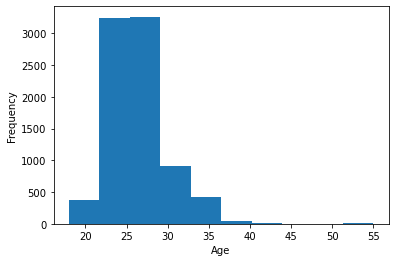

In [6]:
# age distribution of participants
age = df[np.isfinite(df['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

In [7]:
# lets see how many lucky person found the match
pd.crosstab(index=df['match'], columns='counts')

col_0,counts
match,
0,6998
1,1380


In [8]:
data=df

In [9]:
# narrowing the dataset
data_1 = data.iloc[:, 11:28]
data_2 = data.iloc[:,30:35]
data_3 = data.iloc[:, 39:43]
data_4 = data.iloc[:, 45:67]
data_5 = data.iloc[:, 69:74]
data_6 = data.iloc[:, 87:91]
data_7 = data.iloc[:, 97:102]
data_8 = data.iloc[:, 104:107]


date = pd.concat([data.iloc[:, 0],data.iloc[:, 2],data_1,data_2,data_3,data_4,data_5,
                  data_6,data_7,data_8], axis=1)
date.head()

,iid,gender,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,fun3_1,intel3_1,dec,attr,sinc,intel,fun,like,prob,met
0,1,0,11.0,0,0.14,0,27.0,2.0,35.0,20.0,...,8.0,8.0,1,6.0,9.0,7.0,7.0,7.0,6.0,2.0
1,1,0,12.0,0,0.54,0,22.0,2.0,60.0,0.0,...,8.0,8.0,1,7.0,8.0,7.0,8.0,7.0,5.0,1.0
2,1,0,13.0,1,0.16,1,22.0,4.0,19.0,18.0,...,8.0,8.0,1,5.0,8.0,9.0,8.0,7.0,NaN,1.0
3,1,0,14.0,1,0.61,0,23.0,2.0,30.0,5.0,...,8.0,8.0,1,7.0,6.0,8.0,7.0,7.0,6.0,2.0
4,1,0,15.0,1,0.21,0,24.0,3.0,30.0,10.0,...,8.0,8.0,1,5.0,6.0,7.0,7.0,6.0,6.0,2.0


In [10]:
date.isnull().sum()

iid           0
gender        0
pid          10
match         0
int_corr    158
           ... 
intel       296
fun         350
like        240
prob        309
met         375
Length: 67, dtype: int64

In [18]:
# removing null rows
date2 = date.dropna()

In [19]:
# creating an object- free data frame
date3 = date2.drop(['field', 'from', 'career'], axis=1)

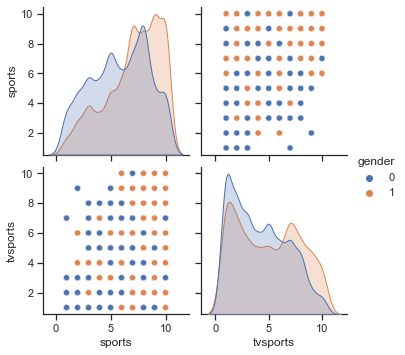

In [20]:
# looking at intrest overlap for sports and tv-sports

sns.set(style='ticks', color_codes=True)
date_int = pd.concat([date3.iloc[:,1], date3.iloc[:, 30:32]], axis = 1)
g = sns.pairplot(date_int, hue='gender')

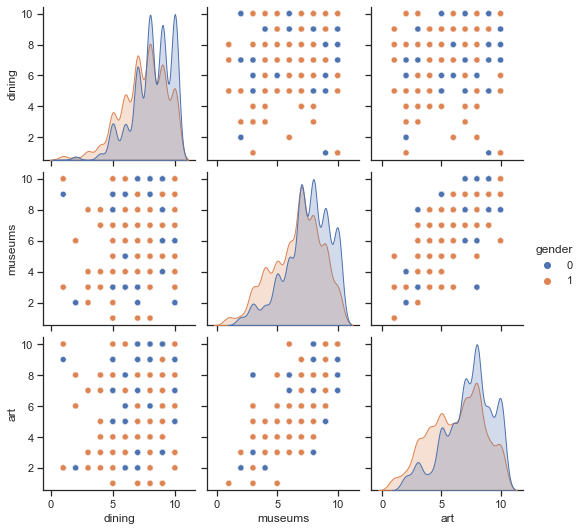

In [21]:
# looking at intrest overlap for dining, museums and arts
sns.set(style='ticks', color_codes=True)
date_int = pd.concat([date3.iloc[:,1], date3.iloc[:, 33:36]], axis = 1)
g = sns.pairplot(date_int, hue='gender')

In [24]:
# removing intrests
date4 = date3.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# preparing the data for train and test
X=date4[['like','dec']]
y=date4['match']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Building a Classifier 

In [29]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# Logistic Regression 

In [43]:
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)

In [44]:
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)

In [45]:
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))

Training Accuracy: 0.8282140886518301


In [46]:
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Validation Accuracy: 0.8279411764705882


In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
cm= confusion_matrix(y_test, predict_test_lrc)

In [49]:
print('Confusion matrix : \n',cm)

Confusion matrix : 
 [[1114    8]
 [ 226   12]]


In [50]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [53]:
print('Classification report for classifier %s:\n%s\n' % (model,
metrics.classification_report(y_test, predict_test_lrc)))

Classification report for classifier LogisticRegression(C=1, random_state=0):
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1122
           1       0.60      0.05      0.09       238

    accuracy                           0.83      1360
   macro avg       0.72      0.52      0.50      1360
weighted avg       0.79      0.83      0.76      1360




# Decision Tree

In [56]:
model_dt= DecisionTreeClassifier(criterion='entropy', random_state=0)

In [59]:
dt=model_dt.fit(X_train, y_train)

In [60]:
predict_train_dt = lrc.predict(X_train)
predict_test_dt = lrc.predict(X_test)

In [61]:
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_dt))

Training Accuracy: 0.8282140886518301


In [62]:
print('Testing Accuracy:', metrics.accuracy_score(y_test, predict_test_dt))

Testing Accuracy: 0.8279411764705882


In [63]:
cm= confusion_matrix(y_test, predict_test_dt)

In [64]:
print('Confusion matrix : \n',cm)

Confusion matrix : 
 [[1114    8]
 [ 226   12]]


In [65]:
print('Classification report for classifier %s:\n%s\n' % (model_dt,
metrics.classification_report(y_test, predict_test_lrc)))

Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=0):
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1122
           1       0.60      0.05      0.09       238

    accuracy                           0.83      1360
   macro avg       0.72      0.52      0.50      1360
weighted avg       0.79      0.83      0.76      1360




# Random Forest Classifier

In [30]:
rf_model=RandomForestClassifier()
rf=rf_model.fit(X_train, y_train)

In [31]:
predict_train_rf = rf.predict(X_train)
predict_test_rf = rf.predict(X_test)

In [32]:
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))

Training Accuracy: 0.8289497884862976


In [33]:
print('Testing Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Testing Accuracy: 0.8272058823529411
